In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [57]:
magazine_d = pd.read_csv('./magazine/final/magazine_Di.csv', sep='|', encoding = 'utf-8')

In [58]:
magazine_d.head()

,Unnamed: 0,magazine,brand,category,title,link,date,contents,title_brand,check,word_dior,sentences_tag,ADFN,item
0,0,A,D,FASHION,빈티지 쇼핑의 시대,http://www.allurekorea.com/2020/10/27/%eb%b9%8...,2020-10-27,"['20년이 지난 패션템에 새로운 활기가 돈다. 바야흐로 빈티지 쇼핑의 시대다.',...",0,0,"['그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지...","[('[', 'SS'), (""'"", 'SS'), ('그러', 'VV'), ('니',...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',...","['옷', '데님', '재킷', '재킷', '재킷', '팬츠', '가방', 'DIOR']"
1,1,A,D,FASHION,"주식을 시작한 패션 에디터의 이야기, 나는 주주다",http://www.allurekorea.com/2020/10/16/%ec%a3%b...,2020-10-16,['주식의 ‘주’자도 모르는 패션 에디터가 주식에 눈뜨려 하는 순간. 이번 시즌 가...,0,0,[' 요즘 들어 주식은 친구들과의 대화에서 빼놓을 수 없는 주제가 되었다. 코로나...,"[('[', 'SS'), (""'"", 'SS'), ('요즘', 'NNG'), ('듣'...","['요즘', '주식', '친구', '과의', '대화', '빼놓', '주제', '코로...","['DIOR', '가방', '가방', '가방', 'DIOR']"
2,2,A,D,FASHION,거리로 나온 하이패션 슈즈들 4,http://www.allurekorea.com/2020/09/16/%eb%a6%a...,2020-09-16,['나이키의 조던 시리즈들 중에서도 역대급으로 평가받는 ‘에어 디올’은 부르는 게 ...,0,0,"[""['나이키의 조던 시리즈들 중에서도 역대급으로 평가받는 ‘에어 디올’은 부르는 ...","[('[', 'SS'), ('""', 'SS'), ('[', 'SS'), (""'"", ...","['나이', '조', '덜', '시리즈', '역대', '급', '평가', '에어',...","['DIOR', '슈즈', 'DIOR', 'DIOR', 'DIOR']"
3,3,A,D,FASHION,차정원부터 아이린까지. 옷 잘입는 셀럽들의 사복 패션에 등장한 뉴 백은 무엇?,http://www.allurekorea.com/2020/08/13/%ec%b0%a...,2020-08-13,"['셀럽들의 데일리룩에서 캐치한 뉴 백!', '@ch_amii', '지갑, 핸드폰,...",0,0,['디올 레이디 디올 디올아무르 미니백 5백만원대'],"[('[', 'SS'), (""'"", 'SS'), ('DIOR', 'OL'), ('L...","['DIOR', 'LADY', 'DIOR', 'DIOR', '아무르', '미니']","['DIOR', 'DIOR', 'DIOR']"
4,4,A,D,CELEBRITY,DON’T CATEGORIZE ME / 유태오,http://www.allurekorea.com/2020/05/28/dont-cat...,2020-05-28,['“Don’t Categorize Me.” 그가 말했다. 배우 유태오는 더없이 자...,0,0,['실크 슬리브리스와 블랙 와이드 팬츠는 김서룡 옴므. 블랙 부츠는 보테가 베네타....,"[('[', 'SS'), (""'"", 'SS'), ('실크', 'NNG'), ('슬리...","['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '...","['팬츠', '부츠', 'DIOR', 'DIOR']"


In [59]:
len(magazine_d)

1759

In [60]:
magazine_d['category'].unique()

array(['FASHION', 'CELEBRITY', 'WELLNESS', 'FEATURE', 'LIFESTYLE',
       'ART&CULTURE', 'CELEBS', 'LIFE', 'LOVE', 'CAREER', 'BEAUTY', '0',
       'STAR', 'Life & Culture', "Today's News", 'Premium Report',
       'Fashion Report', 'World Wide', '라이프', '월드패션', '리뷰', '인스타일',
       '패션뉴스', '스타패션', '핫이슈', '피플앤토크', '패션칼럼', 'HOT & NEW', 'fashion',
       '향장', '2', 'celebrity', 'mc-likes', 'shopperbook', 'ad-campaign',
       'video', 'Fashion', 'Video', 'daily issue', 'People', 'Living',
       'ADVERTORIAL', nan, 'FASHION, 쇼핑, 화보', 'FASHION, 쇼핑, 트렌드',
       'FASHION, 쇼핑', 'FASHION, 트렌드, 화보', 'FASHION, 트렌드',
       '2021 S/S, COLLECTION TV, PARIS', 'FASHION, 화보', 'FASHION, 뉴스',
       'FASHION, W맨, 트렌드', 'W HOT ISSUE', "WHAT'S NEW",
       'FASHION, W맨, 쇼핑, 트렌드', 'FASHION, W맨, 쇼핑', 'FASHION, W맨',
       '2020 F/W, COLLECTION TV, PARIS', 'FASHION, W맨, 뉴스, 쇼핑',
       'LOVE YOUR W', 'FASHION, 뉴스, 화보', 'FASHION, 뉴스, 미분류',
       'FASHION, W맨, 화보', 'FASHION, W맨, 뉴스', 'FASHION, 뉴스, 쇼핑',
     

In [61]:
mag_d = magazine_d[['magazine', 'brand','title', 'link', 'date', 'word_dior','ADFN']]

In [62]:
mag_d.head()

,magazine,brand,title,link,date,word_dior,ADFN
0,A,D,빈티지 쇼핑의 시대,http://www.allurekorea.com/2020/10/27/%eb%b9%8...,2020-10-27,"['그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',..."
1,A,D,"주식을 시작한 패션 에디터의 이야기, 나는 주주다",http://www.allurekorea.com/2020/10/16/%ec%a3%b...,2020-10-16,[' 요즘 들어 주식은 친구들과의 대화에서 빼놓을 수 없는 주제가 되었다. 코로나...,"['요즘', '주식', '친구', '과의', '대화', '빼놓', '주제', '코로..."
2,A,D,거리로 나온 하이패션 슈즈들 4,http://www.allurekorea.com/2020/09/16/%eb%a6%a...,2020-09-16,"[""['나이키의 조던 시리즈들 중에서도 역대급으로 평가받는 ‘에어 디올’은 부르는 ...","['나이', '조', '덜', '시리즈', '역대', '급', '평가', '에어',..."
3,A,D,차정원부터 아이린까지. 옷 잘입는 셀럽들의 사복 패션에 등장한 뉴 백은 무엇?,http://www.allurekorea.com/2020/08/13/%ec%b0%a...,2020-08-13,['디올 레이디 디올 디올아무르 미니백 5백만원대'],"['DIOR', 'LADY', 'DIOR', 'DIOR', '아무르', '미니']"
4,A,D,DON’T CATEGORIZE ME / 유태오,http://www.allurekorea.com/2020/05/28/dont-cat...,2020-05-28,['실크 슬리브리스와 블랙 와이드 팬츠는 김서룡 옴므. 블랙 부츠는 보테가 베네타....,"['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '..."


In [63]:
mag_d.loc[0, 'ADFN'][2]

'빈'

In [64]:
mag_d['ADFN_2'] = mag_d['ADFN']

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
len(mag_d)

1759

In [66]:
mag_d.to_csv('./magazine/final/magazine_Dior.csv', sep = '|', encoding = 'utf-8')

### 쪼개진 단어 붙이기

#### 사전에 등록했으면 하는 단어
살, 프

In [67]:
for word in mag_d['ADFN_2']:
    if "아름" in word:
        print(word)
        print('-'*50)

['긍정', '기운', '뷰티', '라이프', '철학', '가지', '배우', '하늬', 'DIOR', '뷰티', '글로벌', '티', '에이징', '스킨', '케어', '캡', '추', '토탈', 'CAPTURE', 'TOTALE', '아름다움', '관하', '새', '기준', '순간', 'DIOR', '캡', '추', '토탈', '쎄', 'C', 'E', 'L', 'L', '에너지', '라인', '하이', '퍼포먼스', '트리트먼트', '로션', '결', '정돈', '슈퍼', '포', '텐트', '발르', '투명', '광채', '넘치', '가꾸', '푸', '밍', '앤드', '링', '렉', '팅', '크림', '탄력', '건강', '완성', 'DIOR', '뷰티', '캡', '추', '토탈', '제품', '며칠', '생일', '보내', '원래', '생일', '자축', '스타일', '친구', '초대', '즐겁', '지내', '올해', '초대', '메시지', '내두', '막판', '취소', '생일', '즈음', '어제', '사흘', '정도', '앓', '오늘', '촬영', '잘하', '걱정', '현장', '컨디션', '좋', '현장', '거짓말', '괜찮', '드', '그리하', '신기', '그리하', '괜찮', '기', '우주', '에너지', '끌어모으', '버티', '웃음', '아무것', '불가능', '사흘간', '쉬', '오늘', 'DIOR', '뷰티', '코리아', '뮤즈', '기분', '요', '브랜드', '모델', '성장', '영향', '주고받', '파트너', '관계', '생각', 'DIOR', '애쓰', '자연', '마음', '맞', '이야기', '캡', '추', '토탈', '스킨', '케어', '라인', '티', '에이', '징', '진정', '아름다움', '내면', '가치', '추구', '점', '마음', '겉', '드러나', '내면', '아름다움', '관리', '중요', '캡', '추', '토탈', '라인', '패키지', '재활용', '가

In [68]:
# 테일러 / 레이어
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'테일러', '드'", "테일러드")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'레이어', '드'", "레이어드")

mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'테일러', '링'", "테일러링")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'레이어', '링'", "레이어링")

mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'에스', '닉'", "에스닉")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [69]:
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'우', '아함'", '우아')
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'우아한'", '우아')
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'우아미'", '우아')


C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [70]:
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'브로', '우'", '브로우')


C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'셀', '브리', '티'", '셀러브리티')
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'프레스', '티', '지'", '프레스티지')
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'헤', '티'", '헤리티지')
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'카르', '티'", '카르티에')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [72]:
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'밀레', '얼'", '밀레니얼')
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'컨셉', '추', '얼'", '컨셉추얼')
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'임', '페리', '얼'", '임페리얼')


C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [73]:
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'새롭'", "새로운")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'INSTAGRAM'", "인스타그램")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'다이', '아몬드'", "다이아몬드")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'SPORTY'", "스포티")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'꾸뛰'", "COUTURE")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'오뜨'", "HAUTE")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'오트'", "HAUTE")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'오뜨'", "HAUTE")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'멋지'", "멋있다")

mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'소', '셜'", "소셜")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'미니멀', '즘'", "미니멀리즘")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'시스', '루'", "시스루")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'시스', '룩'", "시스루")

mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'팝', '업'", "팝업")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'집', '업'", "집업")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'업', '데이트'", "업데이트")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'레이스', '업'", "레이스업")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'드레스', '업'", "드레스업")

mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'앰', '배서'", "앰배서더")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'새'", "새로운")

mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'뉴', '룩'", "뉴룩")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'뉴', '노멀'", "뉴노멀")

mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'아름다움'", "아름답")
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'아름'", "아름답")

mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'프', '룩'", "프레피룩")

mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace("'CREATIVE'", "크리에이티브")


C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [74]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [75]:
sw_df.columns = ['stopword']

In [76]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [77]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [78]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [79]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해', '티']
for w in add_0:
    stop_words.append(w)

In [80]:
add_1 = ['티','열리', '앤', '따르', '푸', '엘', '루', '커', 'LVMH', '', '비통', 'VALENTINO', '메', '패', '통', 
         '한편', '이비', '당시', '백은', '그렇', '돋보이', '올해', '끌', '점', '파', '얻', 'COM', '반', '블',
         '찾', '세', '시절', '드러내', '이후', '런', '크리스', '사실', '미우', '소', '벨', '다르', '즈', 
         'CALVIN', 'KLEIN', '중요', '슬', '맞', 'W', '일하', '현지', '이렇', '링', 'BALENCIAGA', '사이', 
         '치루이', 'EDITOR', '지난해', '그리', '페', '김', '즐기','이루',  '느끼', '포', '린', '쓰', '기억', 
         '이끌', '올리', '걸', '적인', '트','넘치', 'MAISON','FASHIONN','맡', '떠나', '까', '터', 'ARCHIVE',
         '지', 'HERMES', 'YVES', '유재', 'NFASHIONN', '버버리', 'THE', 'VERSACE', '자체', '이전', '딕트', '빅', '만큼', 'CEO', '느',
        '식', '끝나', '현장', '채우', '짧', '북', 'M', '츠', '넣', '밀', '엠', '레이션', '케어', '열', 
'찍', '토', '감', '담기', '전하', '추', '해지', '역', '닿', '대신', 
        '수많', '치', '질', '얘기', '마무리', '어리', '덜',  'A', '쉬', '깊', '펜', '쉽', '맥',
        '담', '시대', '방식', '자리', '예정', '하이', '부', '만나',
'플', '무슈', '드', '차', '조', '출시', '밝히', '톱', 'SLIMANE', 
'연상', '가능', '약', '이르', '모으', '오르', '남', '멀', '과거', '알리',
'하다', '마라', '투', '마크', '미스', '콜라', '맨', '작', '처', '벌', '셀','캡', '렌', '달', '업','CHRISTIAN',
         '장', '담', '뉴', '부', '탄생', '만나', '플', '드', '밝히', '모르', '주목', 'NV', '우', '생산', '완성', '스킨', '', '힘들',
         '살', '순간', '착용', '토탈', '뷰티', '제작', '마음', '선택', '공개', '웃음', '선택', '처음', '공개', '역할', '고민', '관객', '사용',
'생기', '높', '해석', '리크', 'F', '인물', '특별', '진행', '눈', '몸', '프', '갈', '이어지', '집', '이태', '모와', '틀', '제안', '어울리', '돌', '활동', '원하', '립', 
'가운', '스', '얼', '필요', '장면', '존재', '브릭', '길', '화제', '구성',  '신', '떠오르', '크림', '나서', '제가', '원'
]
for w in add_1:
    stop_words.append(w)

In [81]:
len(stop_words)

1069

In [82]:
print('before', len(before))
print('after', len(after))

before 1435
after 324


In [83]:
mag_d['ADFN_2'] = mag_d['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
before = mag_d[mag_d['date'].str[:4].astype(int)<2020]
after = mag_d[mag_d['date'].str[:4].astype(int)>=2020]

In [85]:
before.reset_index(drop = True, inplace = True)
after.reset_index(drop = True, inplace = True)

In [86]:
noun_adj_list = []
for i in range(len(mag_d)):
    for word in mag_d.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [87]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('DIOR', 4896), ('컬렉션', 1265), ('패션', 1236), ('브랜드', 753), ('드레스', 725), ('쇼', 677), ('디자이너', 653), ('여성', 623), ('룩', 576), ('장식', 550), ('하우스', 485), ('MARIA', 474), ('컬러', 467), ('DESIGN', 457), ('백', 455), ('새로운', 442), ('COUTURE', 425), ('모델', 421), ('디렉터', 421), ('스타일', 416), ('파리', 415), ('시즌', 385), ('재킷', 323), ('소재', 323), ('LADY', 308), ('영감', 298), ('작품', 289), ('크리에이티브', 284), ('블랙', 283), ('팬츠', 277), ('HOMME', 274), ('영화', 269), ('화이트', 264), ('스커트', 264), ('아름답', 253), ('옷', 249), ('세계', 241), ('프랑스', 238), ('JONES', 234), ('아이템', 232), ('배우', 229), ('LAURENT', 229), ('KIM', 227), ('남성복', 224), ('코트', 222), ('HAUTE', 216), ('라인', 211), ('로고', 211), ('럭셔리', 207), ('슈트', 205), ('아티스트', 204), ('패턴', 200), ('사랑', 199), ('좋', 192), ('가죽', 191), ('봄', 187), ('셔츠', 186), ('여름', 186), ('SADDLE', 182), ('데님', 180), ('미국', 179), ('프린트', 176), ('작업', 175), ('의상', 175), ('가방', 164), ('런웨이', 164), ('웨어', 163), ('협업', 163), ('무대', 163), ('유명', 160), ('전시', 160), ('슈즈', 157), ('티셔츠',

In [88]:
common = [ '모델', '패션', '컬렉션', '백', '브랜드',  '쇼' , '룩', '파리', '디자인', '디자이너', 'COUTURE', '세계', '장식',
          '드레스', '여성', '봄', '여름', '가을', '겨울', '광고', 'DESIGN', 'MARIA', 'LADY', '시즌', '새로운']

In [89]:
b_noun_adj_list = []
for i in range(len(before)):
    for word in before.loc[i, 'ADFN_2']:
        if word not in stop_words:
            if word not in common:
                b_noun_adj_list.append(word)

In [90]:
b_word = Counter(b_noun_adj_list)
print(b_word.most_common(200))

[('DIOR', 3944), ('하우스', 407), ('컬러', 391), ('스타일', 353), ('디렉터', 348), ('소재', 267), ('HOMME', 249), ('영감', 248), ('재킷', 237), ('크리에이티브', 236), ('블랙', 236), ('팬츠', 226), ('화이트', 210), ('LAURENT', 209), ('스커트', 207), ('옷', 204), ('JONES', 202), ('코트', 196), ('KIM', 195), ('남성복', 194), ('작품', 193), ('프랑스', 190), ('로고', 186), ('아름답', 181), ('영화', 174), ('아이템', 172), ('럭셔리', 170), ('사랑', 164), ('SADDLE', 164), ('슈트', 163), ('라인', 160), ('HAUTE', 160), ('데님', 159), ('아티스트', 157), ('프린트', 157), ('전시', 150), ('시몬스', 149), ('패턴', 147), ('의상', 146), ('셔츠', 143), ('유명', 142), ('가죽', 142), ('작업', 140), ('웨어', 140), ('런웨이', 140), ('미국', 138), ('JEWERLY', 134), ('티셔츠', 134), ('핑크', 133), ('좋', 132), ('라프', 131), ('슈즈', 130), ('배우', 130), ('무대', 129), ('가방', 127), ('여자', 125), ('골드', 125), ('크루즈', 125), ('패션계', 123), ('아트', 122), ('스타', 121), ('그룹', 121), ('협업', 119), ('데뷔', 117), ('실루엣', 116), ('이미지', 114), ('캠페인', 114), ('영국', 113), ('뉴욕', 113), ('트렌드', 112), ('레드', 112), ('스트리트', 110), ('느낌', 107

In [91]:
a_noun_adj_list = []
for i in range(len(after)):
    for word in after.loc[i, 'ADFN_2']:
        if word not in stop_words:
            if word not in common:
                a_noun_adj_list.append(word)

In [92]:
a_word = Counter(a_noun_adj_list)
print(a_word.most_common(200))

[('DIOR', 952), ('배우', 99), ('작품', 96), ('영화', 95), ('재킷', 86), ('하우스', 78), ('컬러', 76), ('디렉터', 73), ('아름답', 72), ('연기', 72), ('스타일', 63), ('좋', 60), ('아이템', 60), ('촬영', 59), ('감독', 58), ('스커트', 57), ('HAUTE', 56), ('소재', 56), ('화이트', 54), ('패턴', 53), ('자연', 52), ('라인', 51), ('팬츠', 51), ('영감', 50), ('가죽', 49), ('위크', 49), ('크리에이티브', 48), ('프랑스', 48), ('패션쇼', 48), ('블랙', 47), ('아티스트', 47), ('꽃', 46), ('옷', 45), ('마스크', 45), ('남성', 45), ('협업', 44), ('셔츠', 43), ('슈트', 42), ('미국', 41), ('이탈리아', 39), ('좋아하', 38), ('가방', 37), ('럭셔리', 37), ('이야기', 36), ('사랑', 35), ('코로나', 35), ('작업', 35), ('디지털', 35), ('클래식', 35), ('실루엣', 35), ('향수', 34), ('아트', 34), ('무대', 34), ('힘', 33), ('니트', 32), ('로즈', 32), ('스타일링', 32), ('KIM', 32), ('JONES', 32), ('관심', 31), ('미니', 31), ('준비', 31), ('지수', 31), ('빈티지', 30), ('느낌', 30), ('남성복', 30), ('의상', 29), ('이미지', 29), ('무드', 28), ('장인', 28), ('경험', 28), ('수지', 28), ('연극', 28), ('슈즈', 27), ('출연', 27), ('패션계', 27), ('드라마', 27), ('환경', 26), ('대표', 26), ('코트', 26), (

In [93]:
print(b_word.most_common(100))
print('-'*50)
print(a_word.most_common(100))

[('DIOR', 3944), ('하우스', 407), ('컬러', 391), ('스타일', 353), ('디렉터', 348), ('소재', 267), ('HOMME', 249), ('영감', 248), ('재킷', 237), ('크리에이티브', 236), ('블랙', 236), ('팬츠', 226), ('화이트', 210), ('LAURENT', 209), ('스커트', 207), ('옷', 204), ('JONES', 202), ('코트', 196), ('KIM', 195), ('남성복', 194), ('작품', 193), ('프랑스', 190), ('로고', 186), ('아름답', 181), ('영화', 174), ('아이템', 172), ('럭셔리', 170), ('사랑', 164), ('SADDLE', 164), ('슈트', 163), ('라인', 160), ('HAUTE', 160), ('데님', 159), ('아티스트', 157), ('프린트', 157), ('전시', 150), ('시몬스', 149), ('패턴', 147), ('의상', 146), ('셔츠', 143), ('유명', 142), ('가죽', 142), ('작업', 140), ('웨어', 140), ('런웨이', 140), ('미국', 138), ('JEWERLY', 134), ('티셔츠', 134), ('핑크', 133), ('좋', 132), ('라프', 131), ('슈즈', 130), ('배우', 130), ('무대', 129), ('가방', 127), ('여자', 125), ('골드', 125), ('크루즈', 125), ('패션계', 123), ('아트', 122), ('스타', 121), ('그룹', 121), ('협업', 119), ('데뷔', 117), ('실루엣', 116), ('이미지', 114), ('캠페인', 114), ('영국', 113), ('뉴욕', 113), ('트렌드', 112), ('레드', 112), ('스트리트', 110), ('느낌', 107

In [94]:
'힘들', ''

('힘들', '')

In [95]:
count = Counter(noun_adj_list)

In [96]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('DIOR', 4896)
('컬렉션', 1265)
('패션', 1236)
('브랜드', 753)
('드레스', 725)
('쇼', 677)
('디자이너', 653)
('여성', 623)
('룩', 576)
('장식', 550)
('하우스', 485)
('MARIA', 474)
('컬러', 467)
('DESIGN', 457)
('백', 455)
('새로운', 442)
('COUTURE', 425)
('모델', 421)
('디렉터', 421)
('스타일', 416)
('파리', 415)
('시즌', 385)
('재킷', 323)
('소재', 323)
('LADY', 308)
('영감', 298)
('작품', 289)
('크리에이티브', 284)
('블랙', 283)
('팬츠', 277)
('HOMME', 274)
('영화', 269)
('화이트', 264)
('스커트', 264)
('아름답', 253)
('옷', 249)
('세계', 241)
('프랑스', 238)
('JONES', 234)
('아이템', 232)
('배우', 229)
('LAURENT', 229)
('KIM', 227)
('남성복', 224)
('코트', 222)
('HAUTE', 216)
('라인', 211)
('로고', 211)
('럭셔리', 207)
('슈트', 205)
('아티스트', 204)
('패턴', 200)
('사랑', 199)
('좋', 192)
('가죽', 191)
('봄', 187)
('셔츠', 186)
('여름', 186)
('SADDLE', 182)
('데님', 180)
('미국', 179)
('프린트', 176)
('작업', 175)
('의상', 175)
('가방', 164)
('런웨이', 164)
('웨어', 163)
('협업', 163)
('무대', 163)
('유명', 160)
('전시', 160)
('슈즈', 157)
('티셔츠', 157)
('아트', 156)
('JEWERLY', 155)
('시몬스', 155)
('실루엣', 151)
('크루즈', 151)

In [97]:
b_count = Counter(b_noun_adj_list)
a_count = Counter(a_noun_adj_list)

In [98]:
b_word_list = b_count.most_common(500)
for v in b_word_list:
    print(v)

('DIOR', 3944)
('하우스', 407)
('컬러', 391)
('스타일', 353)
('디렉터', 348)
('소재', 267)
('HOMME', 249)
('영감', 248)
('재킷', 237)
('크리에이티브', 236)
('블랙', 236)
('팬츠', 226)
('화이트', 210)
('LAURENT', 209)
('스커트', 207)
('옷', 204)
('JONES', 202)
('코트', 196)
('KIM', 195)
('남성복', 194)
('작품', 193)
('프랑스', 190)
('로고', 186)
('아름답', 181)
('영화', 174)
('아이템', 172)
('럭셔리', 170)
('사랑', 164)
('SADDLE', 164)
('슈트', 163)
('라인', 160)
('HAUTE', 160)
('데님', 159)
('아티스트', 157)
('프린트', 157)
('전시', 150)
('시몬스', 149)
('패턴', 147)
('의상', 146)
('셔츠', 143)
('유명', 142)
('가죽', 142)
('작업', 140)
('웨어', 140)
('런웨이', 140)
('미국', 138)
('JEWERLY', 134)
('티셔츠', 134)
('핑크', 133)
('좋', 132)
('라프', 131)
('슈즈', 130)
('배우', 130)
('무대', 129)
('가방', 127)
('여자', 125)
('골드', 125)
('크루즈', 125)
('패션계', 123)
('아트', 122)
('스타', 121)
('그룹', 121)
('협업', 119)
('데뷔', 117)
('실루엣', 116)
('이미지', 114)
('캠페인', 114)
('영국', 113)
('뉴욕', 113)
('트렌드', 112)
('레드', 112)
('스트리트', 110)
('느낌', 107)
('참석', 106)
('모자', 104)
('꽃', 103)
('패션쇼', 103)
('메이크업', 101)
('매장', 10

In [99]:
a_word_list = a_count.most_common(500)
for v in a_word_list:
    print(v)

('DIOR', 952)
('배우', 99)
('작품', 96)
('영화', 95)
('재킷', 86)
('하우스', 78)
('컬러', 76)
('디렉터', 73)
('아름답', 72)
('연기', 72)
('스타일', 63)
('좋', 60)
('아이템', 60)
('촬영', 59)
('감독', 58)
('스커트', 57)
('HAUTE', 56)
('소재', 56)
('화이트', 54)
('패턴', 53)
('자연', 52)
('라인', 51)
('팬츠', 51)
('영감', 50)
('가죽', 49)
('위크', 49)
('크리에이티브', 48)
('프랑스', 48)
('패션쇼', 48)
('블랙', 47)
('아티스트', 47)
('꽃', 46)
('옷', 45)
('마스크', 45)
('남성', 45)
('협업', 44)
('셔츠', 43)
('슈트', 42)
('미국', 41)
('이탈리아', 39)
('좋아하', 38)
('가방', 37)
('럭셔리', 37)
('이야기', 36)
('사랑', 35)
('코로나', 35)
('작업', 35)
('디지털', 35)
('클래식', 35)
('실루엣', 35)
('향수', 34)
('아트', 34)
('무대', 34)
('힘', 33)
('니트', 32)
('로즈', 32)
('스타일링', 32)
('KIM', 32)
('JONES', 32)
('관심', 31)
('미니', 31)
('준비', 31)
('지수', 31)
('빈티지', 30)
('느낌', 30)
('남성복', 30)
('의상', 29)
('이미지', 29)
('무드', 28)
('장인', 28)
('경험', 28)
('수지', 28)
('연극', 28)
('슈즈', 27)
('출연', 27)
('패션계', 27)
('드라마', 27)
('환경', 26)
('대표', 26)
('코트', 26)
('골프', 26)
('크루즈', 26)
('명품', 25)
('HOMME', 25)
('로고', 25)
('손', 25)
('건강', 24)
('

In [100]:
d_before_ADFN_rank_df = pd.DataFrame(b_word_list)
d_after_ADFN_rank_df = pd.DataFrame(a_word_list)

d_before_ADFN_rank_df.columns = ['word', 'count']
d_after_ADFN_rank_df.columns = ['word', 'count']

In [101]:
# d_before_ADFN_rank_df.columns = ['word', 'count']
# d_after_ADFN_rank_df.columns = ['word', 'count']

In [102]:
d_after_ADFN_rank_df[40:60]

,word,count
40,좋아하,38
41,가방,37
42,럭셔리,37
43,이야기,36
44,사랑,35
45,코로나,35
46,작업,35
47,디지털,35
48,클래식,35
49,실루엣,35


In [103]:
d_ADFN_rank_df = pd.DataFrame(word_list)

In [104]:
d_ADFN_rank_df.columns = ['word', 'count']

In [105]:
d_ADFN_rank_df[:20]

,word,count
0,DIOR,4896
1,컬렉션,1265
2,패션,1236
3,브랜드,753
4,드레스,725
5,쇼,677
6,디자이너,653
7,여성,623
8,룩,576
9,장식,550


In [115]:
d_ADFN_rank_df.to_csv('./magazine/final/d_ADFN_rank_dropword.csv', sep='|', encoding='utf-8', index = False)

In [116]:
mag_d.to_csv('./magazine/final/magazine_d_stickword.csv', sep='|', encoding ='utf-8', index=False)

In [108]:
import matplotlib.pyplot as plt

In [109]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [110]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [111]:
from wordcloud import WordCloud

In [112]:
wc = WordCloud(font_path=font_path, background_color= '#272727', width=600, height=400, colormap = 'BuPu')

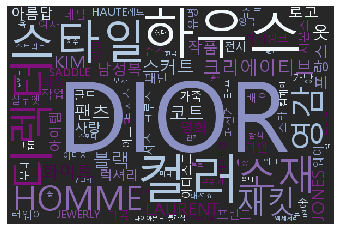

In [113]:
wc.generate_from_frequencies(dict(b_word_list[:100]))

plt.imshow(wc) 
plt.axis('off') 

# plt.savefig('./final_img/rose_total50.png', bbox_inches = 'tight')
plt.show()


wc.to_file('./final_img/dior_before100.png')


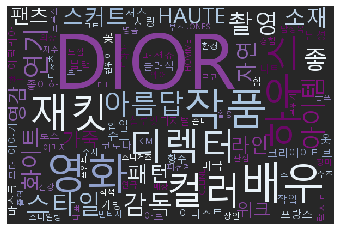

In [114]:
wc.generate_from_frequencies(dict(a_word_list[:100]))

plt.imshow(wc) 
plt.axis('off') 

# plt.savefig('./final_img/rose_total50.png', bbox_inches = 'tight')
plt.show()


wc.to_file('./final_img/dior_after100.png')